In [2]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
import getpass  
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

In [3]:
password = getpass.getpass()

bd = "delivery"
connection_string = 'mysql+pymysql://root:' + password + '@localhost/' + bd
engine = create_engine(connection_string)

## Cancel rate

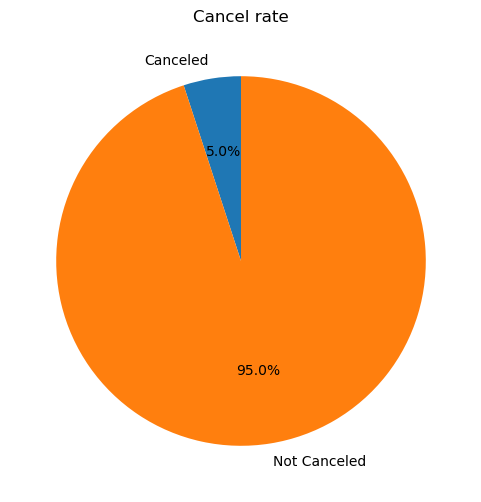

In [233]:
# Cancel rate
consulta1 = """
SELECT (SUM(CASE WHEN action = 'cancel_order' THEN 1 ELSE 0 END) / 
        COUNT(distinct(order_id))) * 100 AS cancel_rate 
FROM delivery.user_actions;
"""
df_cancel = pd.read_sql(consulta1, con=engine)

cancel_rate(df_cancel)

## Time to cancel the order

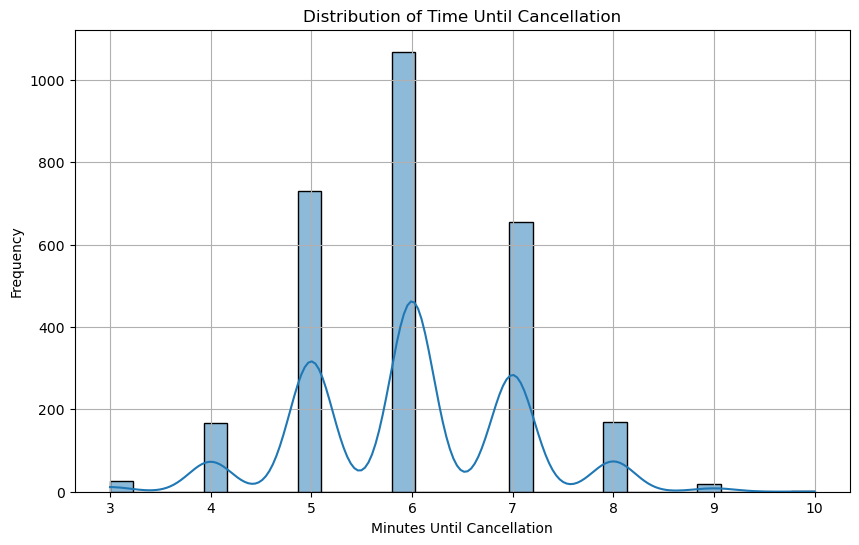

In [234]:
# Time to cancel the order
consulta2 = """
SELECT a.order_id, 
       TIMESTAMPDIFF(MINUTE, a.time, b.time) AS minute_to_cancel 
FROM delivery.user_actions a 
JOIN delivery.user_actions b ON a.order_id = b.order_id 
WHERE a.action = 'create_order' AND b.action = 'cancel_order';
"""
df_cancel_time = pd.read_sql(consulta2, con=engine)

cancel_time(df_cancel_time)

In [208]:
df_cancel_time['minute_to_cancel'].mean()

5.968639887244539

## Average orders by age of users

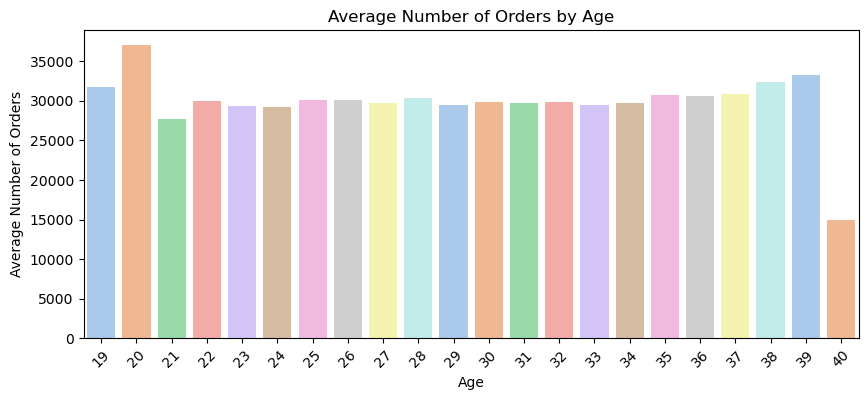

In [238]:
# Avg orders and genre
consulta3 = """
SELECT u.sex, TIMESTAMPDIFF(YEAR, u.birth_date, ua.time) AS age, 
       AVG(distinct(ua.order_id)) AS num_orders 
FROM delivery.users u 
JOIN delivery.user_actions ua ON u.user_id = ua.user_id 
GROUP BY u.sex, age;
"""
df_avg_order = pd.read_sql(consulta3, con=engine)

avg_order(df_avg_order)

## Rate orders by genre

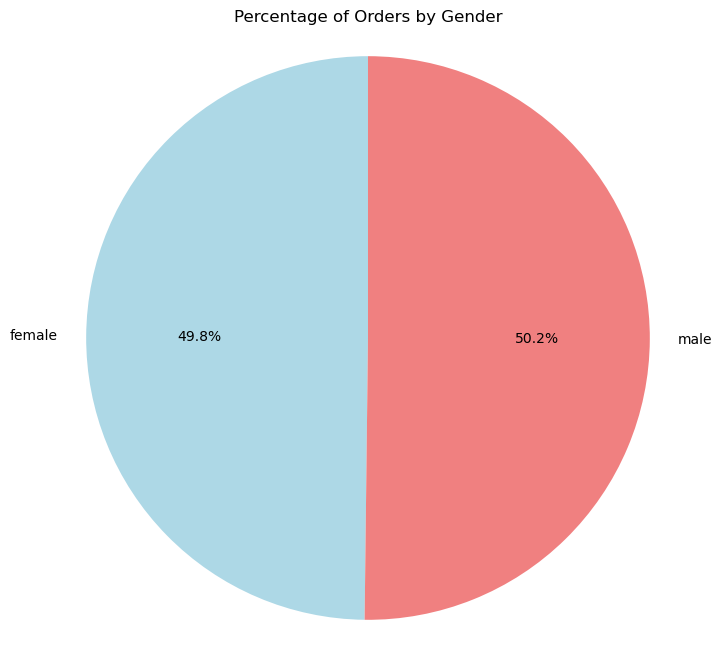

In [240]:
# Rate orders by genre
consulta4 = """
SELECT u.sex, 
       COUNT(distinct(ua.order_id)) AS total_orders 
FROM delivery.users u 
JOIN delivery.user_actions ua ON u.user_id = ua.user_id 
GROUP BY u.sex;
"""
df_rate_ord = pd.read_sql(consulta4, con=engine)

rate_ord(df_rate_ord)


## Total of couriers by age and genre

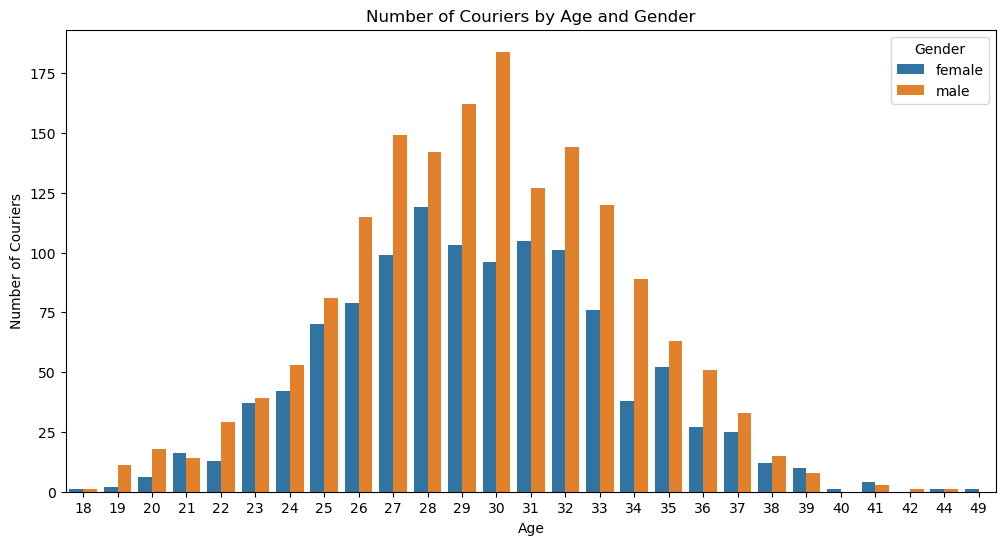

In [242]:
# Total of couriers by age and genre
consulta5 = """
SELECT c.sex, TIMESTAMPDIFF(YEAR, c.birth_date, NOW()) AS age, 
       COUNT(*) AS num_couriers 
FROM delivery.couriers c 
GROUP BY c.sex, age;
"""
df_couriers = pd.read_sql(consulta5, con=engine)

couriers(df_couriers)


## Avg delivery time by age and sex

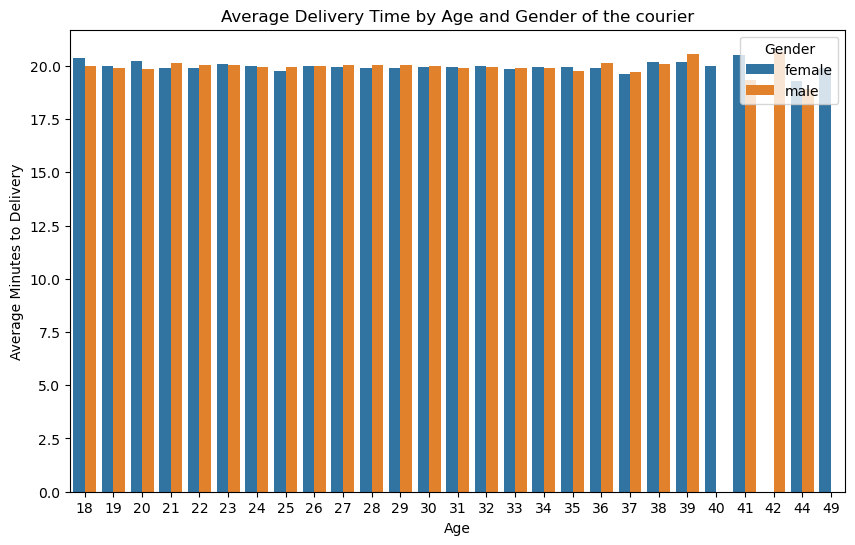

In [244]:
# Avg delivery time by age and sex
consulta6 = """
SELECT c.sex, TIMESTAMPDIFF(YEAR, c.birth_date, ca.time) AS age, 
       COUNT(distinct(ca.order_id)) AS num_orders, 
       AVG(TIMESTAMPDIFF(MINUTE, ca.time, b.time)) AS avg_minutes_to_delivery 
FROM delivery.couriers c 
JOIN delivery.courier_actions ca ON c.courier_id = ca.courier_id 
JOIN delivery.courier_actions b ON ca.order_id = b.order_id 
WHERE ca.action = 'accept_order' AND b.action = 'deliver_order' 
GROUP BY c.sex, age;
"""
df_avg_deliver = pd.read_sql(consulta6, con=engine)

avg_deliver(df_avg_deliver)

## Total users vs total couriers

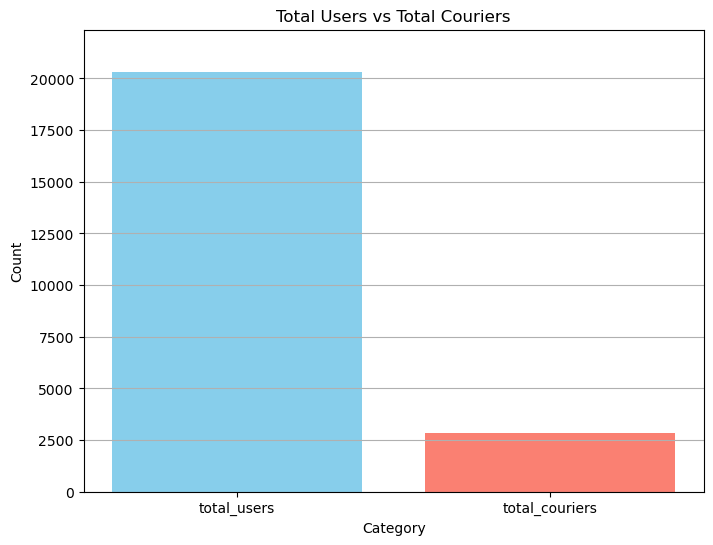

In [245]:
# Total users vs total couriers
consulta7 = """
SELECT (SELECT COUNT(*) FROM users) AS total_users, 
       (SELECT COUNT(*) FROM couriers) AS total_couriers;
"""
df_vs = pd.read_sql(consulta7, con=engine)

users_vs_couriers(df_vs)

In [246]:
users_per_courier = df_vs['total_users'][0] / df_vs['total_couriers'][0]

print(f'Each courier can serve an average of {users_per_courier:.2f} users.')

Each courier can serve an average of 7.20 users.


## Total orders by day of the week and hour

In [251]:
# Total orders by day of the week and hour
consulta8 = """
SELECT DAYOFWEEK(creation_time) AS number_of_week, 
       DAYNAME(creation_time) AS day_of_week, 
       HOUR(creation_time) AS hour_of_day, 
       COUNT(order_id) AS total_orders 
FROM delivery.orders 
GROUP BY number_of_week, day_of_week, hour_of_day 
ORDER BY number_of_week, hour_of_day;
"""
df_order_by_time = pd.read_sql(consulta8, con=engine)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

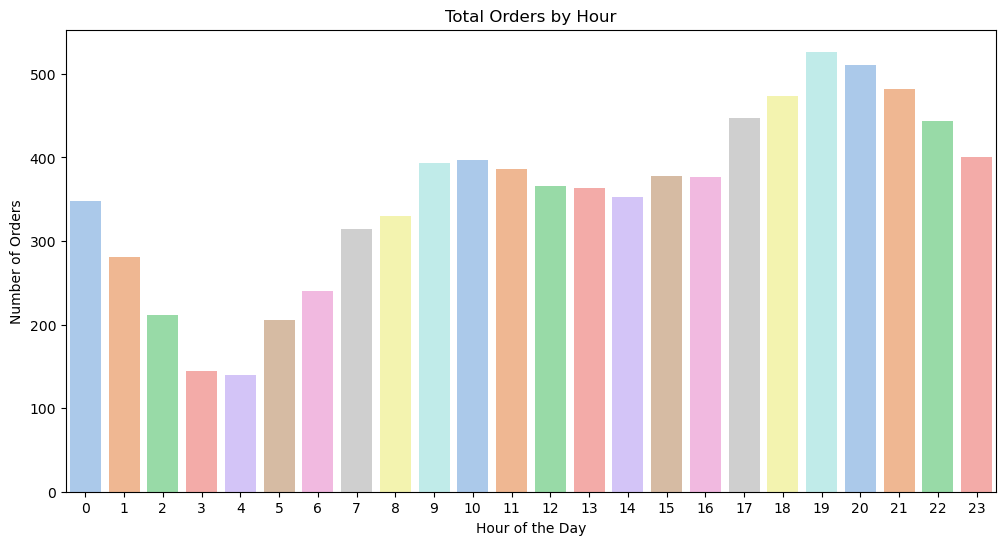

In [258]:
orders_by_hour(df_order_by_time)

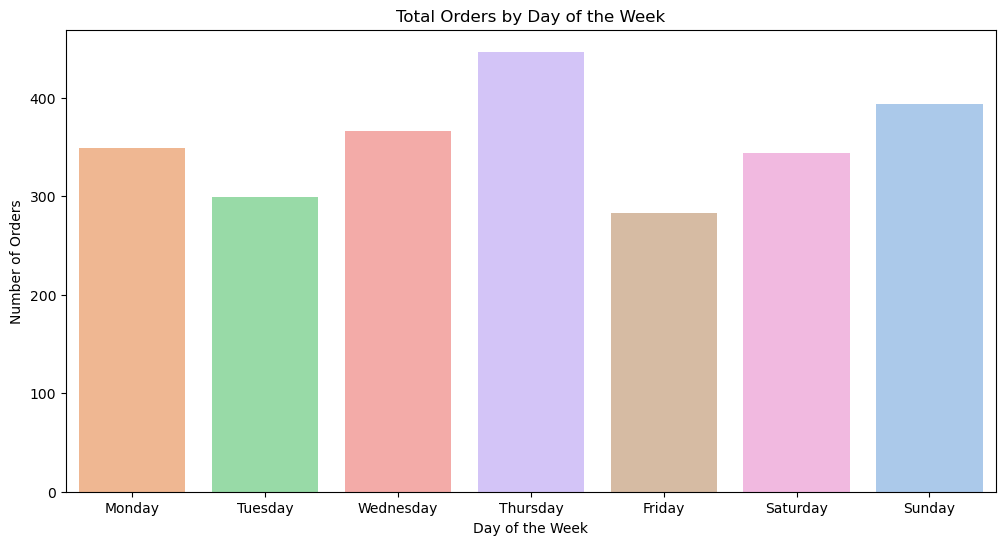

In [259]:
orders_by_day(df_order_by_time, day_order)

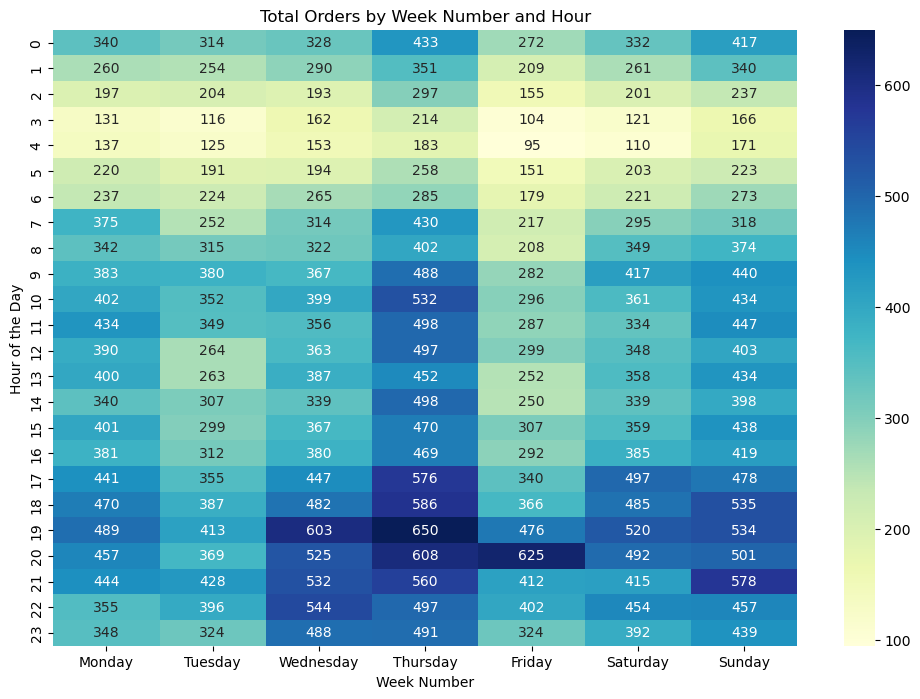

In [257]:
order_by_time(df_order_by_time, day_order)